In [54]:
import os
cwd = os.getcwd()
assert os.path.join(
    os.path.basename(os.path.dirname(cwd)),
    os.path.basename(cwd)) == 'chromatic-encoding/viz', cwd

In [61]:
S3ROOT="s3://sisu-datasets/ce-0"
for encoding in ['ce', 'ft']:
    for i in [512, 1024, 4096]:
        fname = f"url.{encoding}.{i}.wd.tar"
        
        ! cd data && aws s3 cp {S3ROOT}/nn/{fname} .
        ! tar xf data/{fname} -C data
        
        to_rm = ' '.join(
            'data/' + fname[:-len('tar')] + suffix
            for suffix in ['tar', 'log']
        )
        
        ! rm {to_rm}

download: s3://sisu-datasets/ce-0/nn/url.ce.512.wd.tar to ./url.ce.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.1024.wd.tar to ./url.ce.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.4096.wd.tar to ./url.ce.4096.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.512.wd.tar to ./url.ft.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.1024.wd.tar to ./url.ft.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.4096.wd.tar to ./url.ft.4096.wd.tar


In [56]:
import json, glob
df = [json.load(open(f)) for f in glob.glob('data/*.json')]
import pandas as pd
df = pd.DataFrame.from_records(df)
df['memory_gb'] = df['allocated_bytes.all.peak'] / 1024 / 1024 / 1024 # GB
df

,active_bytes.all.peak,allocated_bytes.all.peak,config,dataset,device,encoding,inactive_split_bytes.all.peak,modelname,num_params,num_test,...,test_epoch_logloss,test_logloss,train_acc,train_acc_best_const,train_auc,train_epoch_logloss,train_logloss,train_sec,truncate,memory_gb
0,162280448,162280448,"{'epochs': 20, 'lr': 0.0008997760513084473, 's...",url,cuda,ft,82432512,wd,140096,718839,...,"[0.07068377855815955, 0.06120256814347946, 0.0...",0.046614,0.984936,0.673549,0.998294,"[0.16973227551332032, 0.07630983341180507, 0.0...",0.045537,808.875409,512,0.151135
1,1297046528,1297046528,"{'epochs': 20, 'lr': 6.573214670265969e-05, 's...",url,cuda,ft,660106240,wd,1118528,718839,...,"[0.05658729396720128, 0.04877582003800618, 0.0...",0.029754,0.992421,0.673549,0.999651,"[0.2912932783046849, 0.06038971823413876, 0.05...",0.023964,3305.099195,4096,1.207969
2,1860180992,1860180992,"{'epochs': 20, 'lr': 0.0008997760513084473, 's...",url,cuda,ce,888693248,wd,48046263,718839,...,"[0.05463577682723442, 0.04487977774637277, 0.0...",0.052203,0.999272,0.673549,0.999997,"[0.1592461690147463, 0.043869304150611306, 0.0...",0.002063,3069.913525,4096,1.732429
3,726146048,726146048,"{'epochs': 20, 'lr': 0.0008997760513084473, 's...",url,cuda,ce,80834560,wd,47128759,718839,...,"[0.06526479768960457, 0.05020758966336889, 0.0...",0.054404,0.999014,0.673549,0.999997,"[0.15527512811997654, 0.04863607347175315, 0.0...",0.003924,878.304178,512,0.676276
4,324389888,324389888,"{'epochs': 20, 'lr': 0.0008997760513084473, 's...",url,cuda,ft,40650240,wd,279872,718839,...,"[0.06481564348090461, 0.054083015926220036, 0....",0.049221,0.987906,0.673549,0.998984,"[0.1471840371929282, 0.06728942224799095, 0.05...",0.036168,1098.016276,1024,0.302112
5,888151040,888151040,"{'epochs': 20, 'lr': 0.0008997760513084473, 's...",url,cuda,ce,140151296,wd,47259831,718839,...,"[0.05708590864809721, 0.04857203614656718, 0.0...",0.055547,0.999037,0.673549,0.999993,"[0.13310604698623965, 0.04695256703711764, 0.0...",0.003366,1182.661047,1024,0.827155


In [57]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

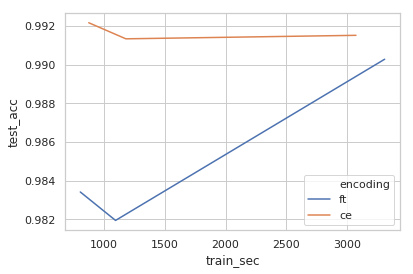

In [58]:
# x = 
g = sns.lineplot(data=df, x='train_sec', y='test_acc', hue='encoding')

#handles, labels = g.get_legend_handles_labels()
#g.legend(handles[1:], labels[1:], loc='center left', bbox_to_anchor=(1.05, 0.5))
g.legend()
#plt.savefig('out/frontier.pdf',  bbox_inches='tight')

plt.show()

{'epochs': 20, 'lr': 0.0008997760513084473, 'sparse_lr': 0.006301157076762002, 'wd': 0.00015545608747938975}


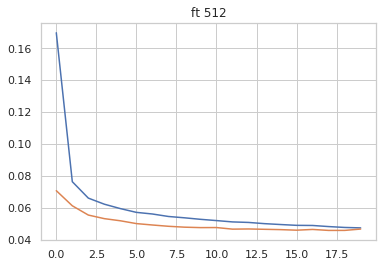

{'epochs': 20, 'lr': 6.573214670265969e-05, 'sparse_lr': 0.0021873960541613263, 'wd': 6.751383304677264e-05}


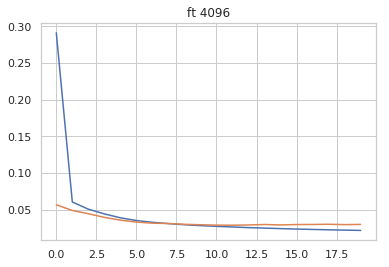

{'epochs': 20, 'lr': 0.0008997760513084473, 'sparse_lr': 0.006301157076762002, 'wd': 0.00015545608747938975}


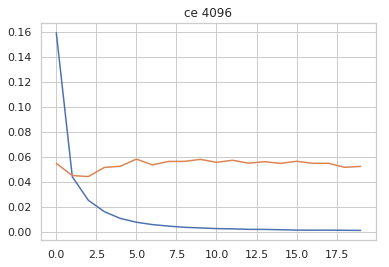

{'epochs': 20, 'lr': 0.0008997760513084473, 'sparse_lr': 0.006301157076762002, 'wd': 0.00015545608747938975}


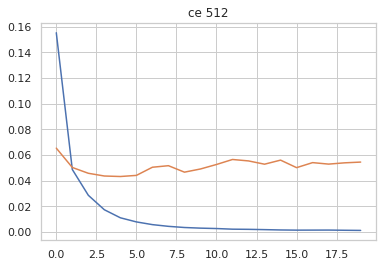

{'epochs': 20, 'lr': 0.0008997760513084473, 'sparse_lr': 0.006301157076762002, 'wd': 0.00015545608747938975}


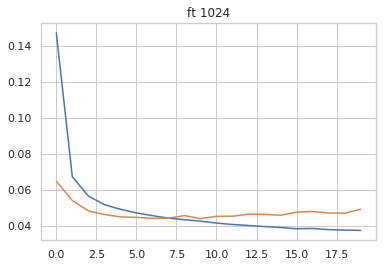

{'epochs': 20, 'lr': 0.0008997760513084473, 'sparse_lr': 0.006301157076762002, 'wd': 0.00015545608747938975}


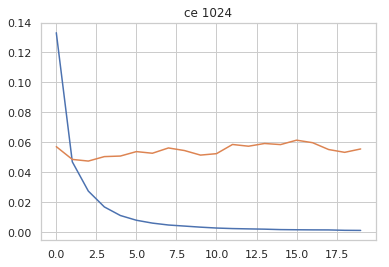

In [59]:
for row in df.itertuples():
    print(row.config)
    plt.plot(row.train_epoch_logloss, label='train')
    plt.plot(row.test_epoch_logloss, label='test')
    plt.title(row.encoding + ' ' + str(row.truncate))
    plt.show()

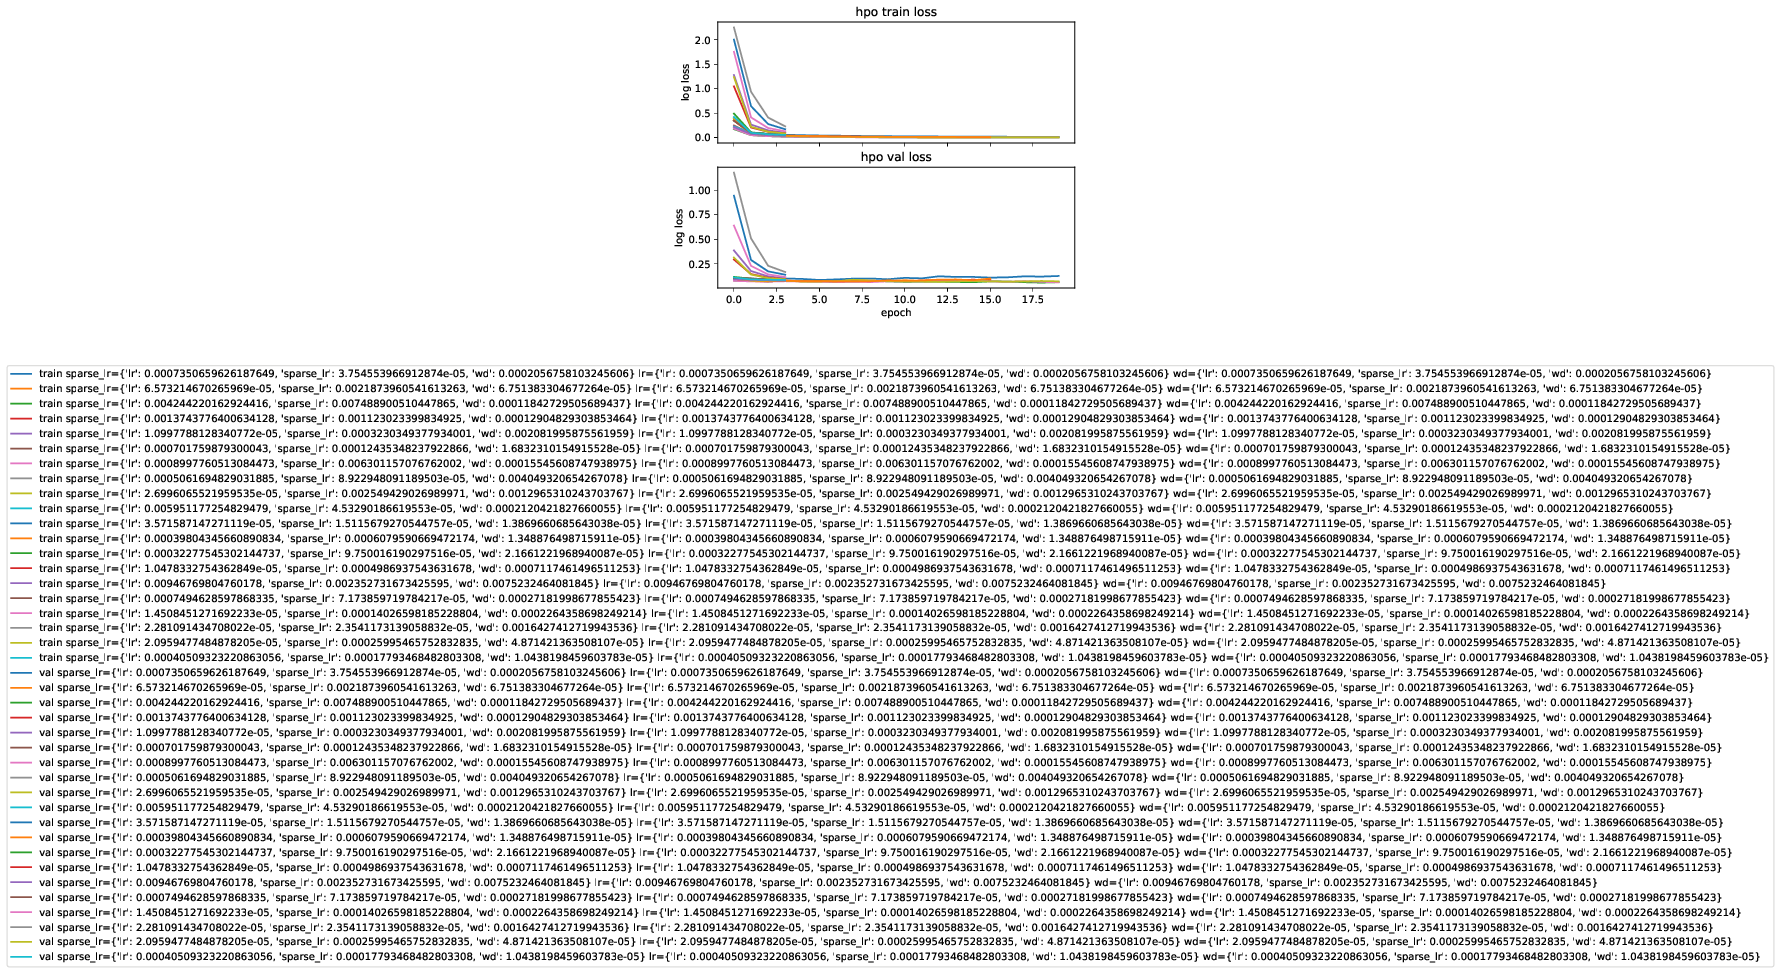

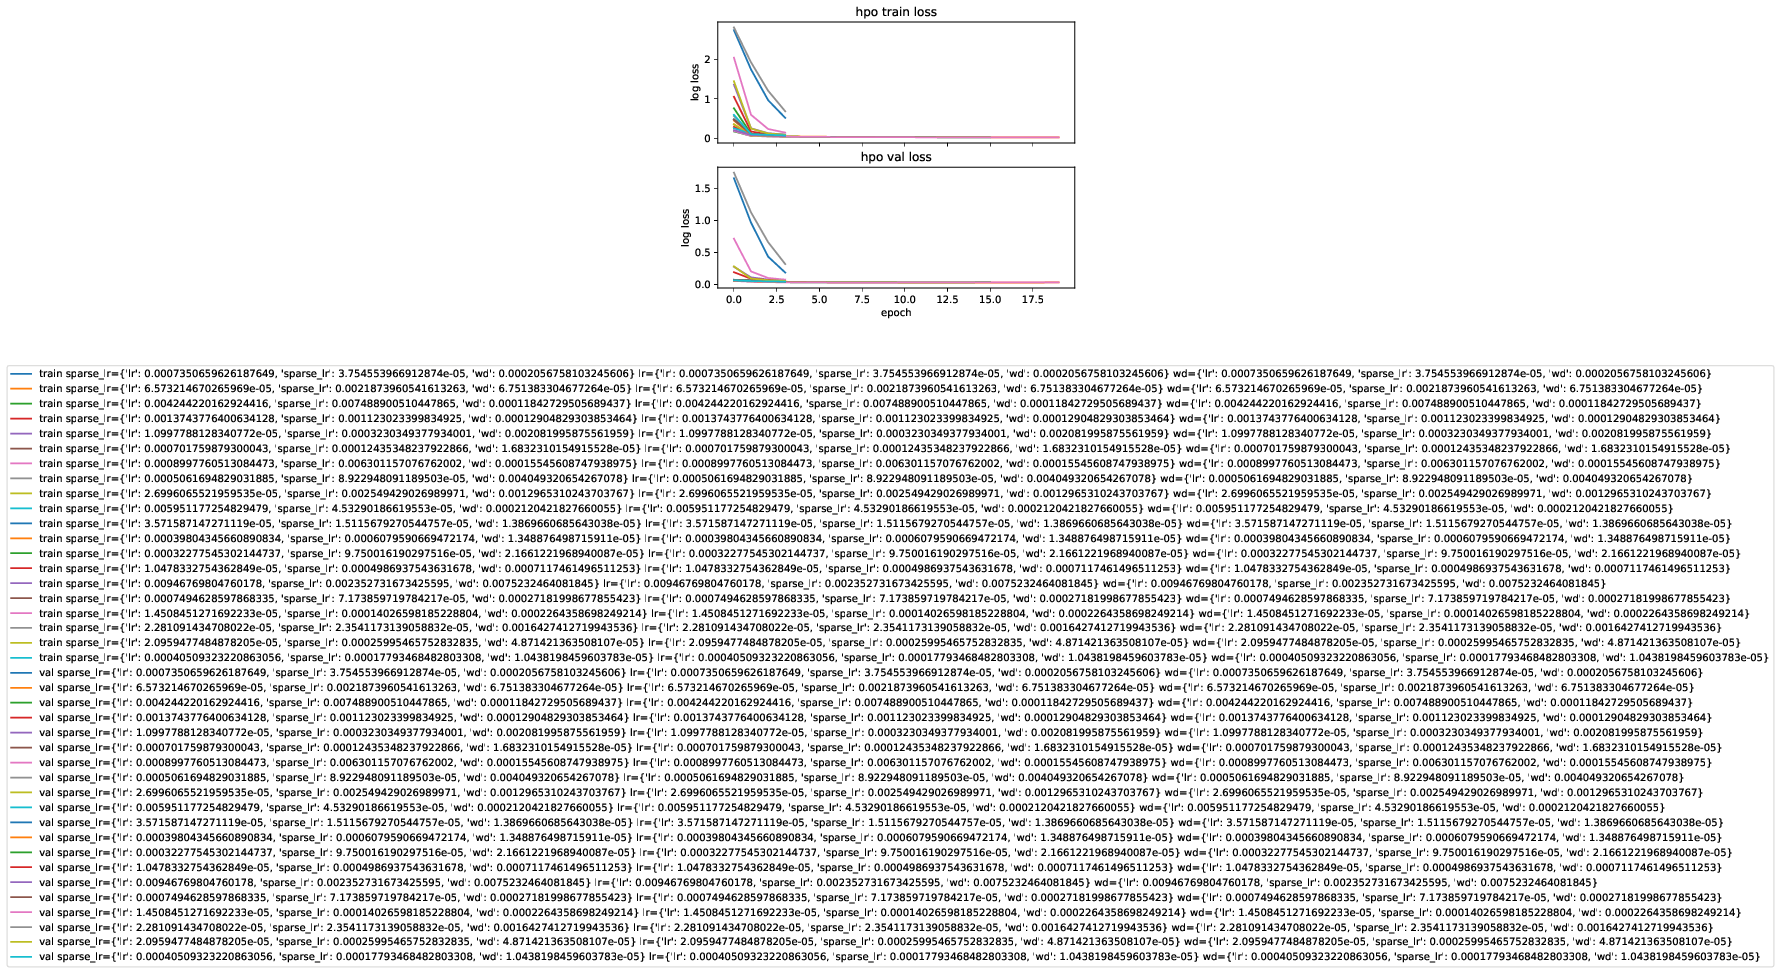

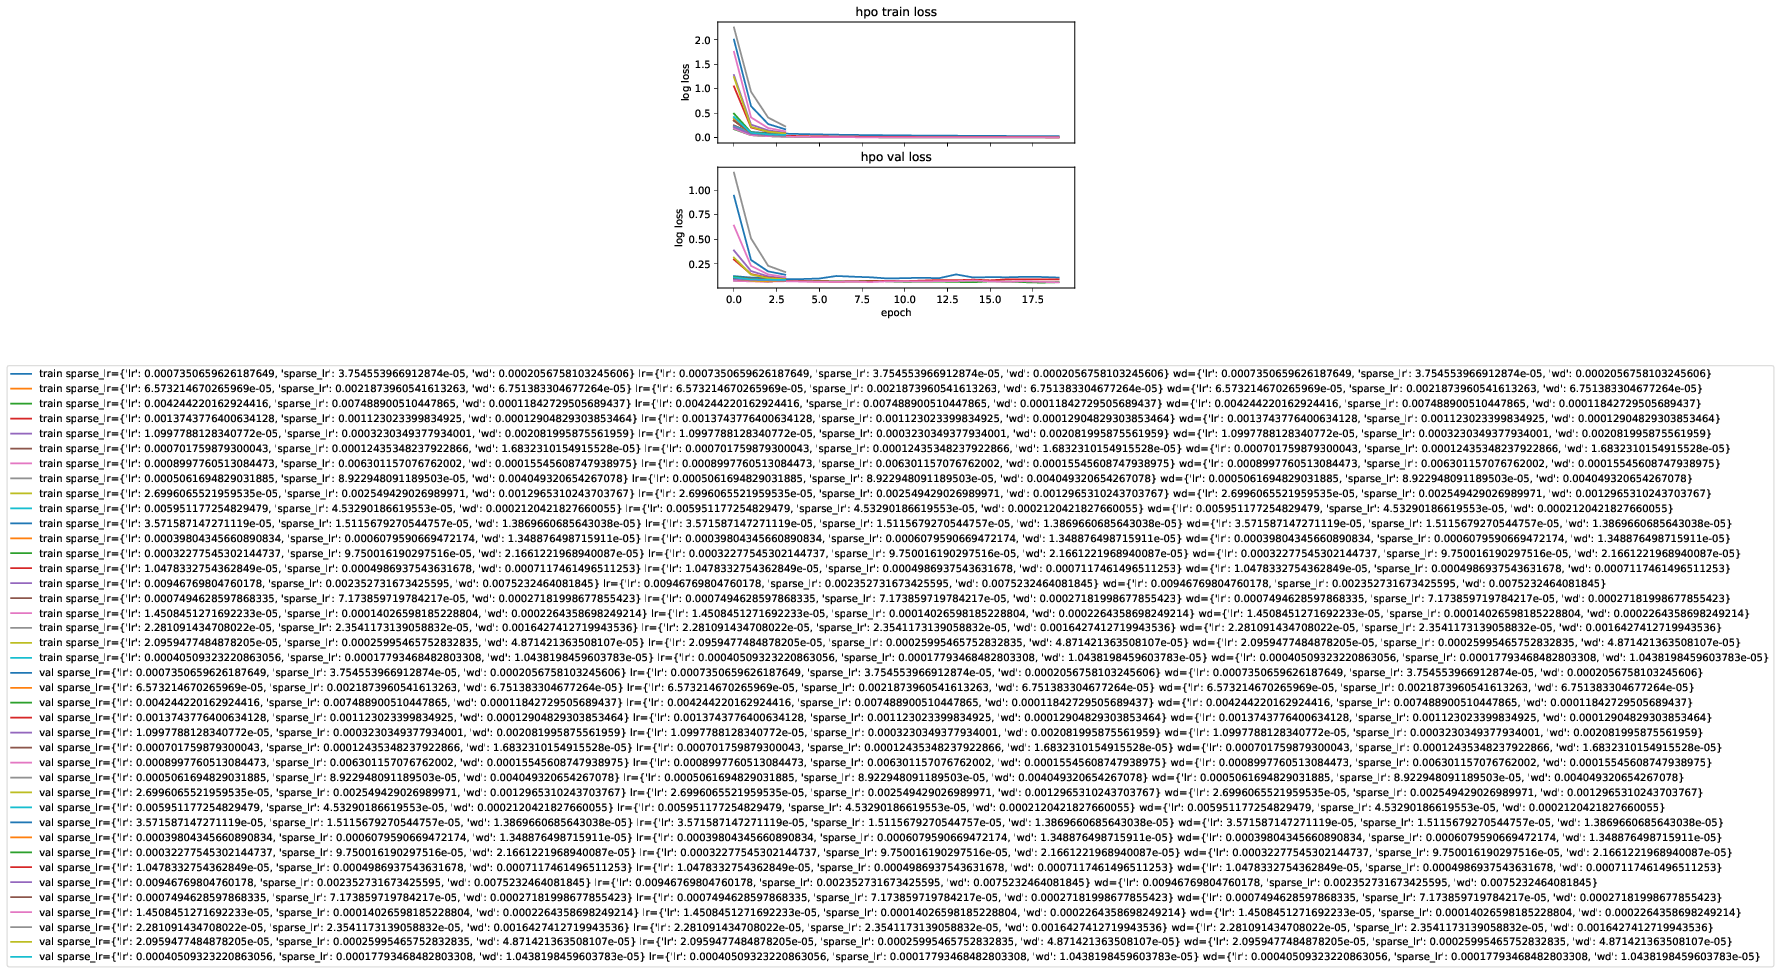

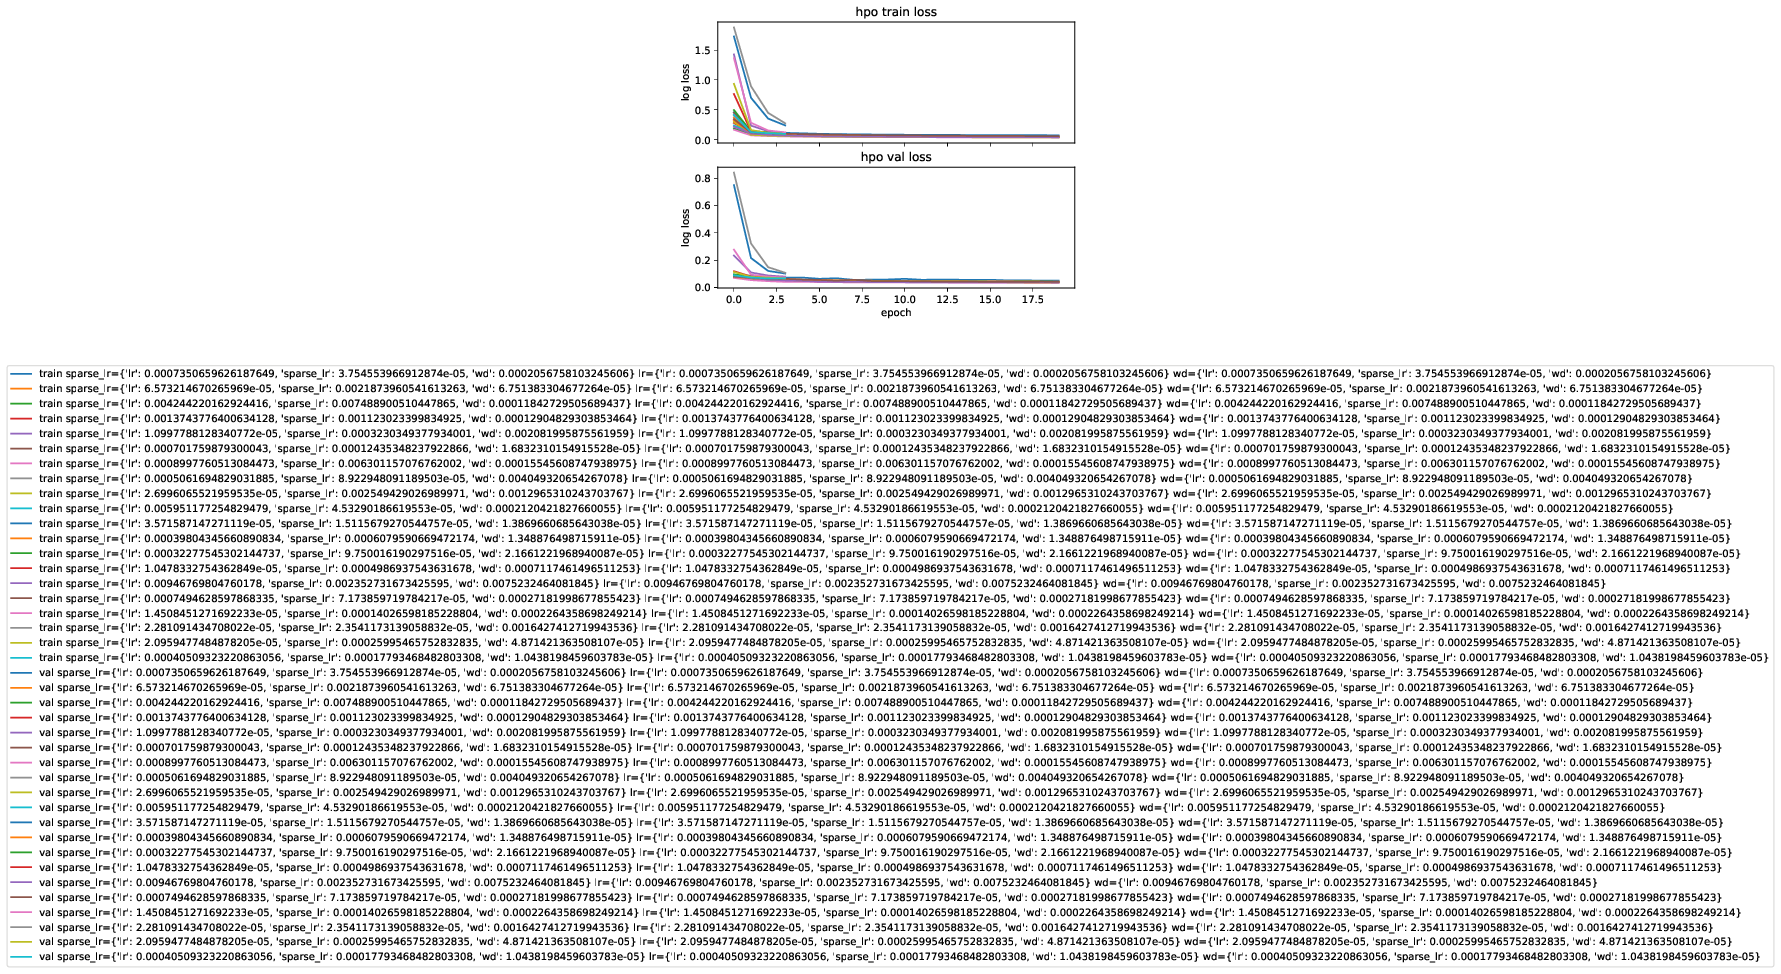

In [ ]:
from wand.image import Image as WImage
from IPython.display import display
for f in glob.glob('data/*.pdf'):
    display(WImage(filename=f))